## Coding and homework

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/GabbySuwichaya/Estimation-Theory-EE523/blob/master/Tutorial2/main.ipynb)

by *Suwichaya Suwanwimolkul, Ph.D.*

The coding exercies and examples are used as parts of  *Lecture: estimator properties*  in **Estimation Theory EE2102523**. 

The topics covered in this exercise are: 
  
- [Estimator Properties](#estimator-properties)
    - [Bianess](#biasness)
    - [MSE](#mse)
    - [Consistency](#consistency)
- [HW](#homework)
    - [Empirical Variance Estimator](#empirical-variance-estimator)
    - [Sample Variance Estimator](#sample-variance-estimator)
 
 

Notes.
- The examples of biased vs unbiased estimators are inspried by [Sampling \& Estimation EP.3 by Khalel Corona](https://www.youtube.com/watch?v=pNbDigYLqSY).
-  Don't forget to install the dependency `pip install -r requirements.txt`
- `utils.py` contains the supplenmary implementations for each fucntion used in `Lecture1.ipynb` 

In [ ]:
! pip install numpy pandas tqdm matplotlib joypy

In [2]:
import numpy as np
import numpy as np  
from matplotlib import cm
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

import os

np.random.seed(0)
cwd = os.getcwd()

def hist_plot(sample_mean_estimates, gt, func, estimator_name = "sample mean", ploting = "Bias" , dirpath=None):
    value = func(sample_mean_estimates, gt)
    ploting_title = "%s [%s] = %.2f" % (ploting, estimator_name, value)
    
    plt.hist(sample_mean_estimates, bins=100, density=True, color="blue", alpha = 0.2, label="distribution of estimates") 
    plt.axvline(x=gt,  color="black",  linewidth=2,      label="True mean") 
    plt.axvline(x=np.mean(sample_mean_estimates), color="red", linestyle="--", label="Average of estimators")
    plt.legend(loc='lower right')
    plt.ylabel("Freq. (Density)")
    plt.xlabel("Samples")
    plt.title(ploting_title)
    plt.grid()
    plt.savefig(os.path.join(dirpath, "%s-%s.pdf" % (ploting, estimator_name)))
    plt.savefig(os.path.join(dirpath, "%s-%s.png" % (ploting, estimator_name)))
    plt.show()

## Estimator properties

- [Biasness](#biasness)
- [MSE](#mse)
- [Consistency](#consistency)

### Biasness

Let $\Theta := f(X_1, X_2, ..., X_N)$ be the point estimator for $\theta$. The bias of the point estimator is defined as 
\begin{equation}  
\text{Bias}_{\theta}{(\Theta)} = E(\Theta) - \theta.
\end{equation}

#### Example: biasness of sample mean estimator  

Define true population

In [3]:
data_population = np.random.randn(10000000) 
gt = np.mean(data_population) # is the true value of the mean of the population

Let $X_1$, $X_2$,  ..., $X_n$ be a random sample sharing the same distribution as  $X$, but the parameters (\eg, mean and variance) could be unknown. 
 
**Sample mean** is used as an estimator for the mean value of $X$,  is defined as 
\begin{equation}
    \Theta_{\mu} := \bar{X} = \frac{1}{n} \sum_{i=1}^{n} X_i 
\end{equation}

To implement this:

We want to check weather or not the sample_mean() estimator is unbiased. 
So, we have to perform the following steps:
- Sampling a set of samples (100 samples) from the given populatoin of the distrubtion of interest. 
- The sampled set will be the population of a random sample
- Calculate the mean of each sampled set. 
- Calculate the sample mean

In [4]:
def sample_mean_simulation(data_population, samples=10000, replace = True, N_select =10): 
    # Inputs:
    # data_population is the populatoin of the distrubtion of interest
    # N_select        is the number of random samples 
    # samples         is the number of samples for each random sample
    # replace         is the type of sampling  

    # Outputs:
    # sample_mean is the estimate of sample meaning using N_select random samples.

    random_sample_list = []
 
    for i in range(N_select):
        data_subsample      = np.random.choice(data_population, samples, replace=replace) 
        random_sample_list.append(data_subsample)       

    # Calculate the sample mean
    sample_mean = np.sum(random_sample_list, axis=0)/len(random_sample_list)   

    return sample_mean  

Then, we compute the bias of the given estimators  

In [5]:
def bias_func(estimates, gt):
    return np.mean(estimates) - gt

N_select = 100 # the number of samples selected from the entire population 

estimator_name_temp  =  "sample mean"   
sample_mean_estimate = sample_mean_simulation(data_population, samples=1000, replace = True, N_select = int(N_select))   # simulating the sample mean estimator (the sample mean estimates are the output). 

# Example usage of the bias function
bias = bias_func(sample_mean_estimate, gt) # compute the bias

 and show the histogram of estimators.

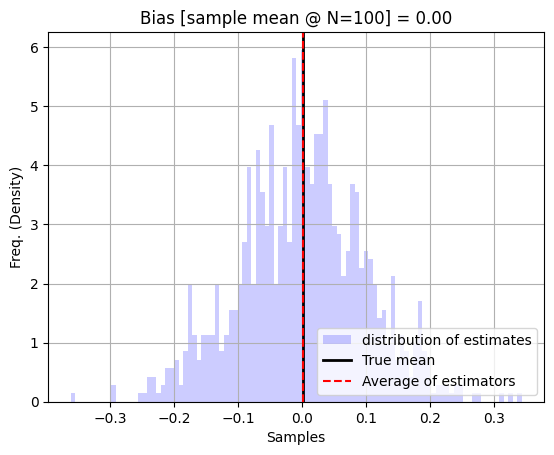

In [6]:
# plotting histrogram, mean of the estimators, and the true mean value of the data population 
hist_plot(sample_mean_estimate,  gt, bias_func, estimator_name = "%s @ N=%d" % (estimator_name_temp, N_select), ploting = "Bias", dirpath=cwd)

### MSE



#### Definition:

If  $\Theta$ is an unbiased estimator of $\theta$, ie, $E[\Theta] = \theta$, then the efficiency of the estimator is **inverse proportional** to $\text{Var}{[\Theta]}  = E[(\Theta-\mu_{\Theta})^2]$. **An efficient estimator** can also be characterized by having the lower variances from the true value $\theta$, which can be measured by mean-square error (MSE) ... 

**Mean squared error (MSE) of an estimator $\Theta$**  is defined as: 

\begin{equation}  
MSE_{\theta}(\Theta) = E_{\Theta} [(\Theta - \theta)^2].
\end{equation} 

The smaller MSE is generally indicative of the better estimator. 

#### Example: MSE of sample mean estimators 

In [7]:
def MSE_func(estimates, gt):
    var = np.var(estimates)  
    bias_square =  (np.mean(estimates) - gt)**2
    return var, bias_square 

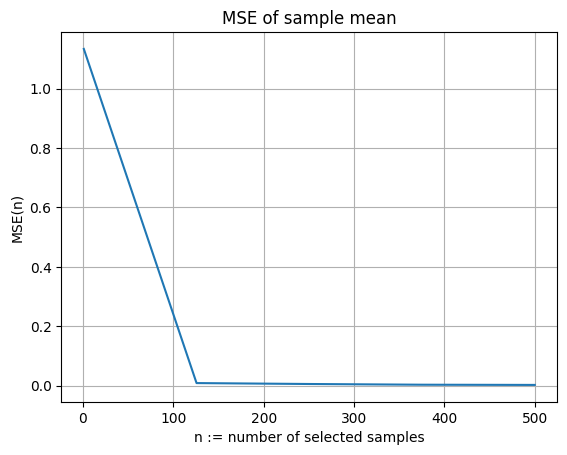

In [8]:
# MSE
N_select_list = np.linspace(1, 500, 5).tolist() # Adjust the ranges of n and see the convergence of MSE
ploting  = "MSE"
MSE_list = []  

gt = np.mean(data_population)

for N_select in N_select_list: 
    sample_mean_estimates = sample_mean_simulation(data_population, samples=100, replace = True, N_select = int(N_select))      
    var, bias_square = MSE_func(sample_mean_estimates, gt)    
    mse              = var + bias_square
    MSE_list.append(mse)
    
plt.plot(N_select_list, MSE_list)
plt.xlabel("n := number of selected samples")
plt.ylabel("MSE(n)")
plt.title("MSE of %s" % estimator_name_temp)
plt.grid()
plt.savefig(os.path.join(cwd, "%s-%s.pdf" % (ploting, estimator_name_temp)))
plt.savefig(os.path.join(cwd, "%s-%s.png" % (ploting, estimator_name_temp)))
plt.show()


### Consistency



#### Definition:

Let $\Theta_1, \Theta_2, ..., \Theta_n, ...,$ be a sequence of the point estimator $\Theta$; each of which is sorted by the number of the random samples  $n$.  
 
Here, we write an estimator as a function of $n$ random samples explicitly, ie, $\Theta=\Theta_n = f(X_1, X_2, ..., X_n)$.   
 
For any $\epsilon > 0$,  we say that $\Theta$ is a consistent estimator of $\theta$, if 
\begin{equation}
    \lim_{n \rightarrow \infty} P (|\Theta_n - \theta | \geq \epsilon) = 0  \hspace{0.5cm} \text{for all possible value of~} \theta.
\end{equation}

In other words, an estimator $\Theta$ is a consistent estimator for $\theta$, if  
$\Theta$ converges to $\theta$ in probability, or $\Theta \xrightarrow{p} \theta$.



#### Example: Consistency of Sample Mean Estimators

In this example, we look at the density of $\Theta_n - \theta$ to reflect the empirical distribution of $P (\Theta_n - \theta) $.

We want to check the following characteristics:

- Does the empirical distribution of $ \Theta_n - \theta $ is centering at 0  ? 
- Is the shape of the distribution is getting smaller and smaller such that it can be bounded by a small positive value ($\epsilon$) ? 

If the empirical distribution shows these characteristics, it suggests that the estimator converges to $\theta$ in probability (as verified by the shape of the histrogram density). 

In [9]:
# Consistency 
ploting  = "Consistency"
gt = np.mean(data_population)

print("The ground true mean is %f" % gt)

The ground true mean is 0.000303


In [10]:
epsilon = 0 
N_select_list =  np.linspace(1, 100000, 5).astype(int).tolist()# Adjust the ranges of n and see the convergence of Consistency  
Population_list = [] 
  
df_logics = {}

for N_select in N_select_list:
    
    sample_mean_estimates = sample_mean_simulation(data_population, samples=1000, replace = True, N_select = int(N_select))   
     
    estimates_diff           = sample_mean_estimates - gt 
    print("av. sample mean %f" % np.mean(estimates_diff) )
    print("gt. mean %f" % gt )
    print("av. diff %f" % np.mean(np.absolute(estimates_diff)) ) 
    df_logics["N=%d" % int(N_select)] = (1.0*(np.absolute(estimates_diff) > 0.01).reshape(-1)).tolist() 



av. sample mean 0.025774
gt. mean 0.000303
av. diff 0.790068
av. sample mean -0.000257
gt. mean 0.000303
av. diff 0.005101
av. sample mean -0.000184
gt. mean 0.000303
av. diff 0.003626
av. sample mean 0.000149
gt. mean 0.000303
av. diff 0.002966
av. sample mean -0.000040
gt. mean 0.000303
av. diff 0.002694


<>:3: SyntaxWarning: invalid escape sequence '\T'
<>:4: SyntaxWarning: invalid escape sequence '\T'
<>:3: SyntaxWarning: invalid escape sequence '\T'
<>:4: SyntaxWarning: invalid escape sequence '\T'
/tmp/ipykernel_21005/523655134.py:3: SyntaxWarning: invalid escape sequence '\T'
  plt.xlabel("$|\Theta_N - \mu| \geq \epsilon$")
/tmp/ipykernel_21005/523655134.py:4: SyntaxWarning: invalid escape sequence '\T'
  plt.title("Show  Emperical Density for $P(|\Theta_N- \mu| \geq \epsilon)$ ")


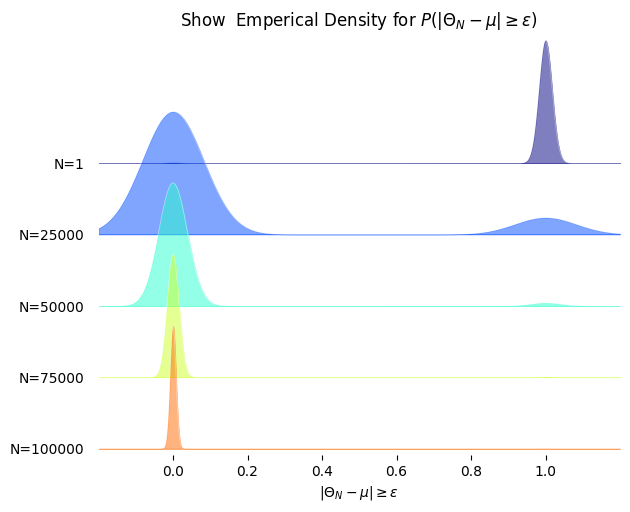

In [11]:
import joypy
joypy.joyplot(df_logics, overlap=1, hist=False, colormap=cm.jet, alpha=0.5, linecolor='w', linewidth=.5, xlabels=True, ylabels=True, ylim='mean')
plt.xlabel("$|\Theta_N - \mu| \geq \epsilon$") 
plt.title("Show  Emperical Density for $P(|\Theta_N- \mu| \geq \epsilon)$ ") 
plt.show() 

## Homework

Let $X_1, X_2, ...$ be a random sample from a distribution with mean $\mu$ and variance $\sigma^2$.  
 

At first, let's calculate the true value for the populatoin variance

In [12]:
gt = np.var(data_population)

### Tasks

- Q1. Is the empirical variance $S^2_{\mu}$,  an unbiased estimator for variance $\sigma^2$?    ***Hint!*** Check if  $E[S^2_{\mu}]  - \sigma^2 = 0$?

- Q2. Is sample variance $S^2$ an unbiased estimator for variance $\sigma^2$?   

- Q3. At $n = 1, 5, 10, 100$ (`N_select`:= $n$), and simulate the bias of both estimators  $S^2_{\mu}$ and $S^2$. 
    -  Write the description for each simulation at different $n$ values. 
    - Provide **two sets of  plots** for the estimators $S^2$ and $S^2_{\mu}$, ie, the histogram of estimators, the mean of estimators, and the true variance (provided by `hist_plot`).  

### Empirical variance estimator

Definition.

Let $X_1$, $X_2$,  ..., $X_n$ be a random sample sharing the same distribution as  $X$, but the parameters ,eg, mean and variance, could be unknown. 

***Empirical variance estimator*** for variance of $X$ is defined as 

\begin{equation}  
   S^2_{\mu} = \frac{1}{n}  \sum_i \left( X_i - \bar{X} \right)^2  
\end{equation}

In [13]:
def empirical_variance_simulation(data_population, samples=1000, replace = True, N_select = 10): 
    # Inputs:
    # data_population is the populatoin of the distrubtion of interest
    # N_select        is the number of random samples 
    # samples         is the number of samples for each random sample
    # replace         is the type of sampling  

    # Outputs:
    # sample_mean is the collection of the sample mean estimates from each random sample.
    # sample_variance is the collection of the empirical estimates from each random sample.

    random_sample_list = []

    for i in range(N_select):
        data_subsample = np.random.choice(data_population, samples, replace=replace)
 
        random_sample_list.append(data_subsample)

    sample_mean    = np.sum(random_sample_list, axis=0)/len(random_sample_list)  

    sample_variance = np.sum((random_sample_list - sample_mean)**2, axis=0)/(len(random_sample_list))
    return sample_variance, sample_mean

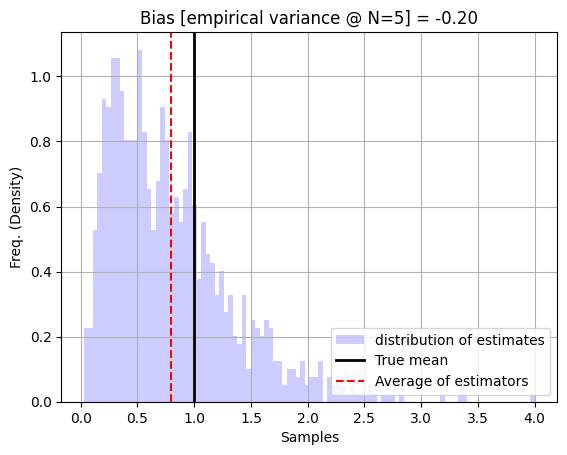

In [14]:
N_select = 5
  
gt = np.var(data_population) 

sample_variance, sample_mean = empirical_variance_simulation(data_population, samples=1000, replace = True, N_select = N_select) 
hist_plot(sample_variance, gt, bias_func, estimator_name = "empirical variance @ N=%d" % N_select, ploting = "Bias", dirpath=cwd)

### Sample variance estimator

Definition

Let $X_1$, $X_2$,  ..., $X_n$ be a random sample sharing the same distribution as  $X$, but the parameters ,eg, mean and variance, could be unknown. 

***Sample variance estimator*** for variance of $X$ is defined as 
\begin{equation}
    S^2 = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})^2 
\end{equation}

In [15]:
def sample_variance_simulation(data_population, samples=1000, replace = True, N_select = 10):  
    # Inputs:
    # data_population is the populatoin of the distrubtion of interest
    # N_select        is the number of random samples 
    # samples         is the number of samples for each random sample
    # replace         is the type of sampling  

    # Outputs:
    # sample_mean is the collection of the sample mean estimates from each random sample.
    # sample_variance is the collection of the estimates from each random sample.

    random_sample_list = []

    for i in range(N_select):
        data_subsample = np.random.choice(data_population, samples, replace=replace)
 
        random_sample_list.append(data_subsample)

    sample_mean    = sum(random_sample_list)/len(random_sample_list)  

    sample_variance = np.sum((random_sample_list - sample_mean)**2, axis=0)/(len(random_sample_list)-1)
    return sample_variance, sample_mean

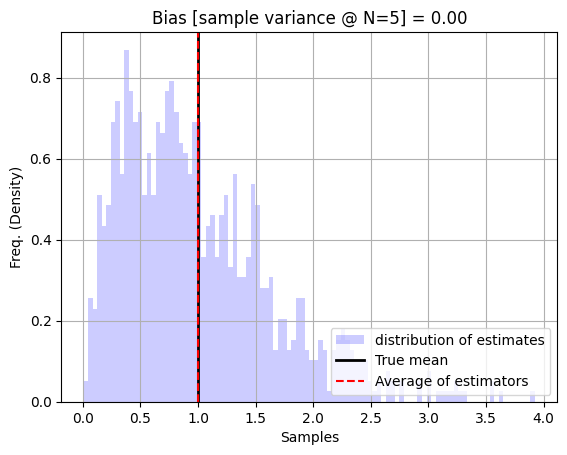

In [16]:
N_select = 5
sample_variance_estimates, sample_mean = sample_variance_simulation(data_population, samples=1000, replace = True, N_select= N_select)   
hist_plot(sample_variance_estimates, gt, bias_func, estimator_name = "sample variance @ N=%d" % N_select, ploting = "Bias", dirpath=cwd) 
 